In [1]:
import h5py
import numpy as np
import pickle
import matplotlib.pyplot as plt
from pyproj import Transformer, Geod
from rasterio.plot import show
from affine import Affine

In [2]:
transformer_ps2latlon = Transformer.from_crs("EPSG:3031", "EPSG:4326")
transformer_latlon2ps = Transformer.from_crs("EPSG:4326", "EPSG:3031")
geodesic = Geod(ellps='WGS84')

rift_path = pickle.load( open( 'data/hc-path.pkl', "rb" ) )
riftx,rifty = np.array(rift_path.xy)

[riftlat,riftlon] = transformer_ps2latlon.transform(riftx,rifty)


/tmp/ipykernel_1373015/2234307070.py:5: UserWarning: Unpickling a shapely <2.0 geometry object. Please save the pickle again; shapely 2.1 will not have this compatibility.
  rift_path = pickle.load( open( 'data/hc-path.pkl', "rb" ) )


In [3]:
datafile = h5py.File('/data/fast0/ATL06/ATL06_20200316035237_12280610_004_01.h5')
h   = np.array( datafile['/gt1l/land_ice_segments/h_li'] )
lat = np.array( datafile['/gt1l/land_ice_segments/latitude'] )
lon = np.array( datafile['/gt1l/land_ice_segments/longitude'] )
datafile.close()

datafile = h5py.File('/data/fast0/ATL06/ATL06_20200614233221_12280710_004_01.h5')
h2   = np.array( datafile['/gt1l/land_ice_segments/h_li'] )
lat2 = np.array( datafile['/gt1l/land_ice_segments/latitude'] )
lon2 = np.array( datafile['/gt1l/land_ice_segments/longitude'] )
datafile.close()

In [4]:
# Load the .npz file
loaded_data = np.load(f'data/LC08_L1GT_184113_184114_20200220_mosaic.npz')

# Assuming the array was saved as 'arr_0' by default, load it as 'norm1'
norm1 = loaded_data['arr_0']

# Load the .npz file
# loaded_data = np.load(f'data/LC08_L1GT_184113_184114_20210206_mosaic.npz')
loaded_data = np.load(f'data/LC08_L1GT_184113_184114_20211020_mosaic.npz')

# Assuming the array was saved as 'arr_0' by default, load it as 'norm1'
norm2 = loaded_data['arr_0']

# Create the Affine object with the same parameters
transform_info = Affine(30.0, 0.0, -819915.0, 0.0, -30.0, 1635615.0)

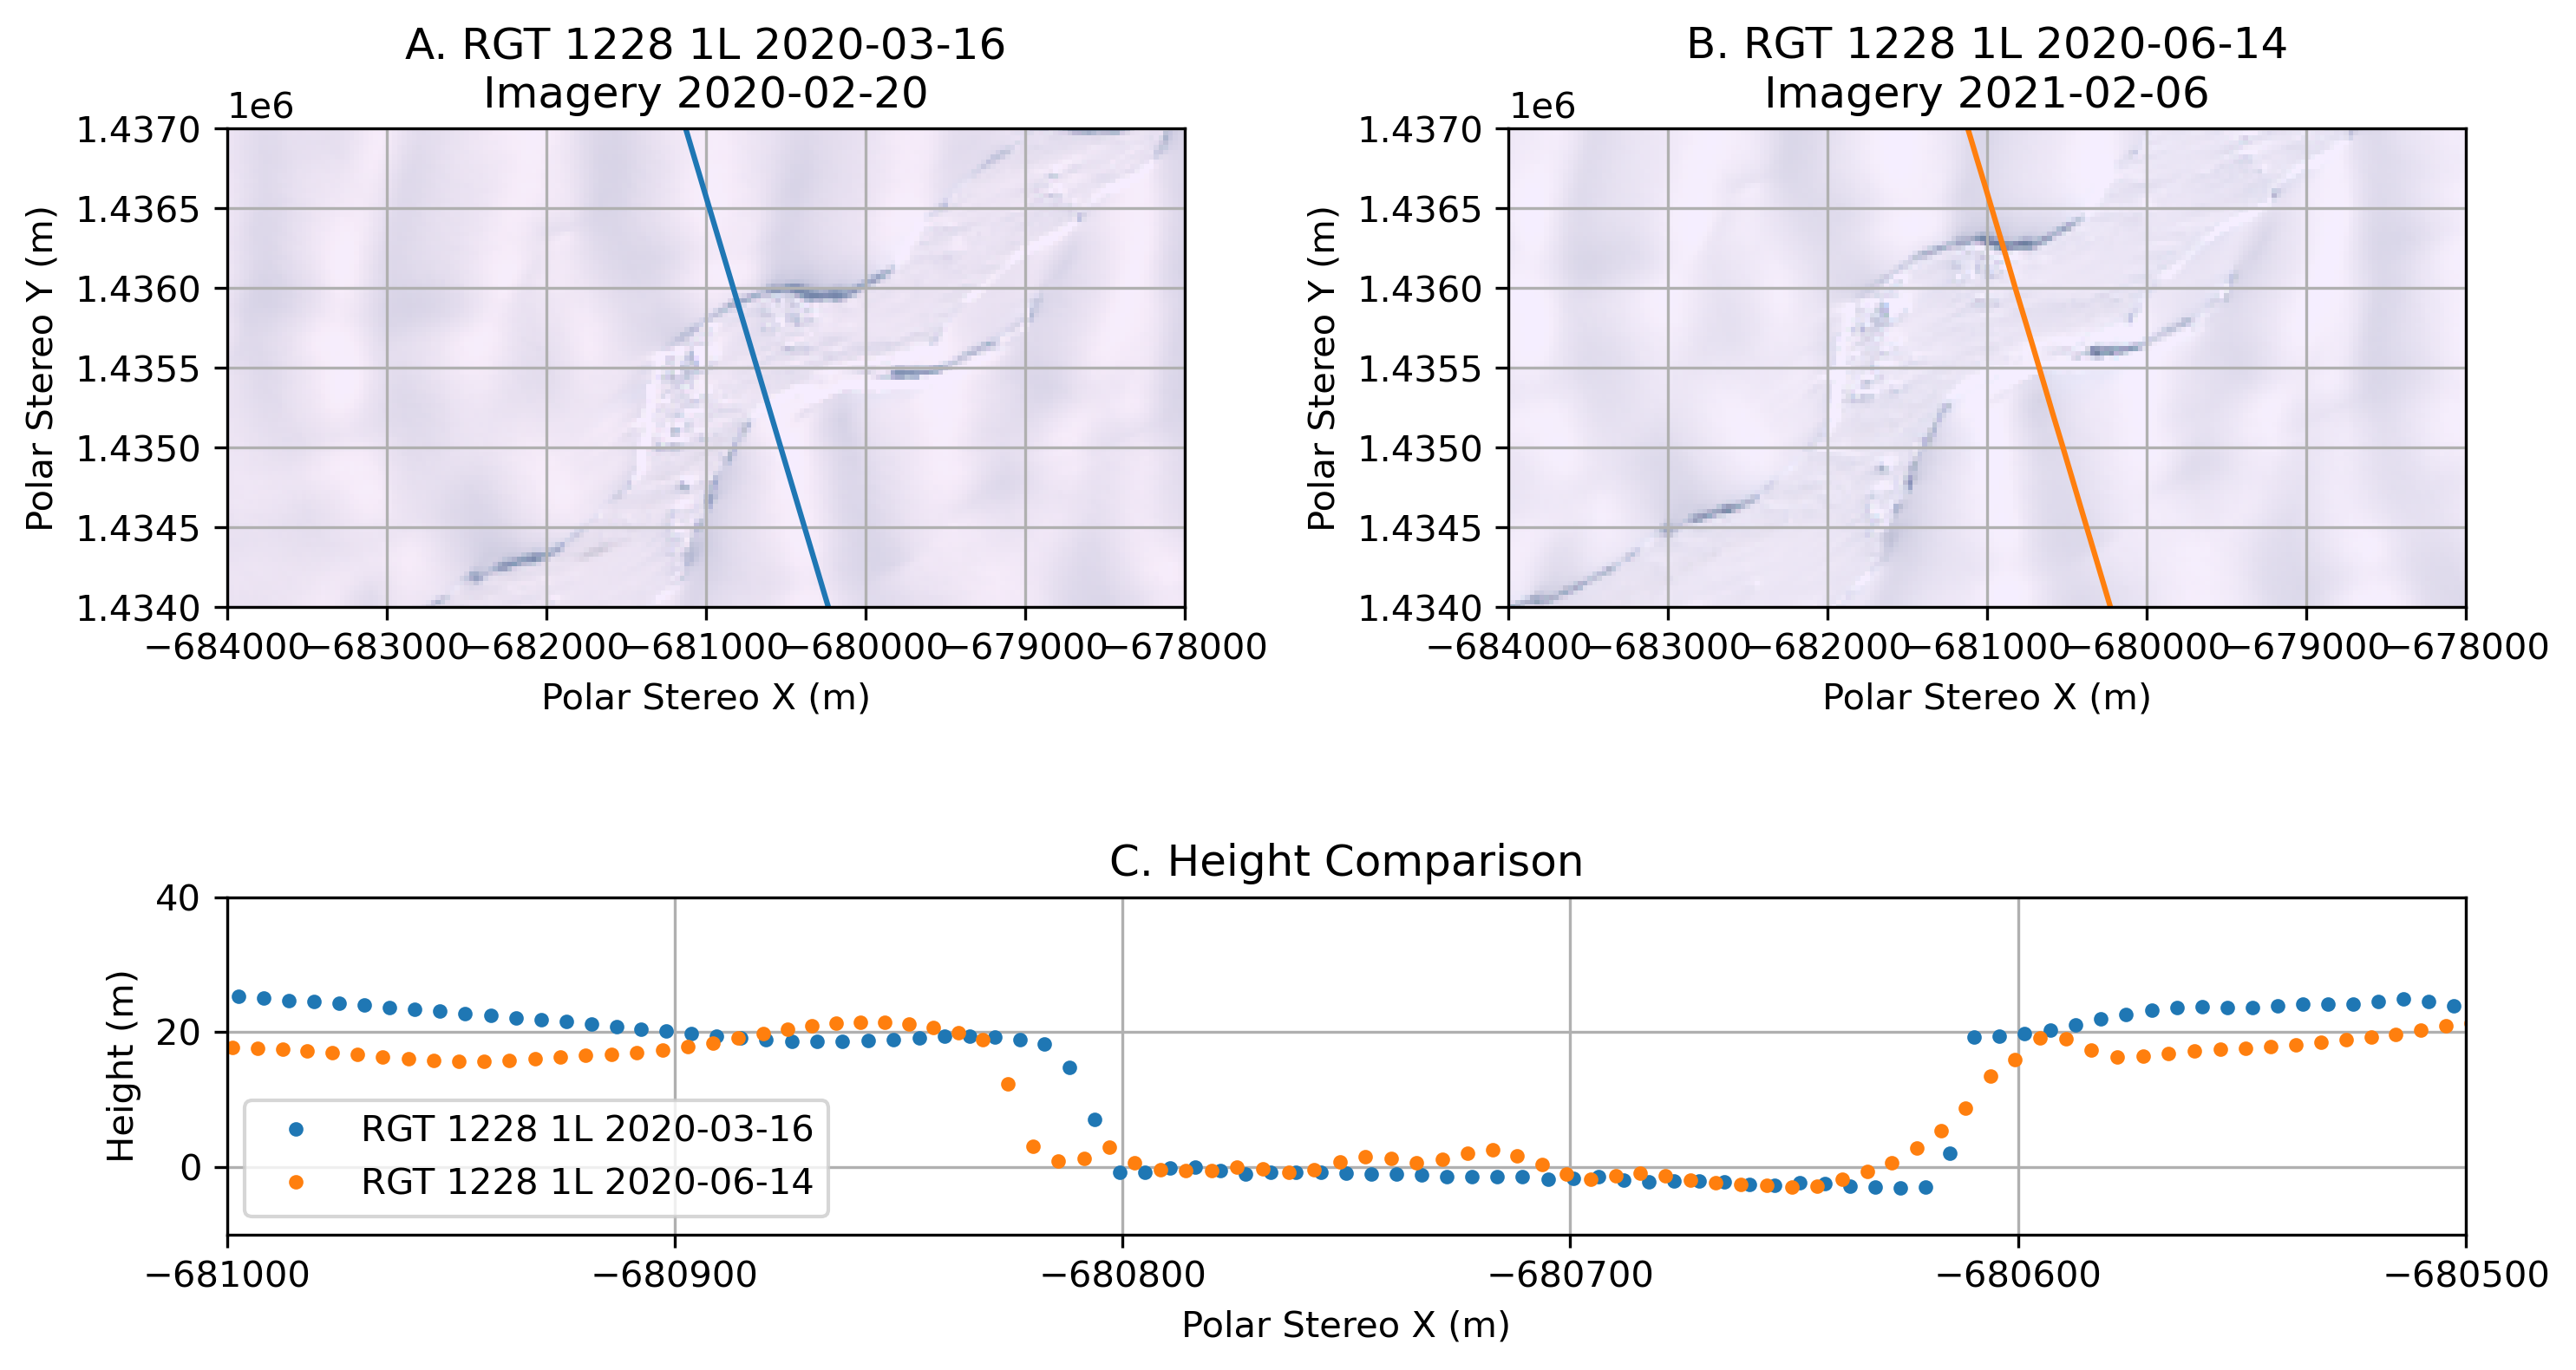

In [15]:
import matplotlib.pyplot as plt
from rasterio.plot import show

# Transform coordinates
x, y = transformer_latlon2ps.transform(lat, lon)
x2, y2 = transformer_latlon2ps.transform(lat2, lon2)

# Create a figure and a GridSpec with 2 rows and 2 columns
fig = plt.figure(figsize=(10, 6), dpi=300)
gs = fig.add_gridspec(2, 2, height_ratios=[3,1])

# First subplot (A) on the first row, first column
ax1 = fig.add_subplot(gs[0, 0])

# Third subplot (C) on the first row, second column
ax3 = fig.add_subplot(gs[0, 1])

# Second subplot (B) spanning the second row across both columns
ax2 = fig.add_subplot(gs[1, :])

# Plotting for subplot A
show(norm1.transpose(2, 0, 1), transform=transform_info, ax=ax1)
ax1.plot(x, y)
ax1.set_xlim([-684e3, -678e3])
ax1.set_ylim([1434e3, 1437e3])
ax1.grid()
ax1.set_title('A. RGT 1228 1L 2020-03-16\nImagery 2020-02-20')
ax1.set_xlabel('Polar Stereo X (m)')
ax1.set_ylabel('Polar Stereo Y (m)')

# Plotting for subplot C
show(norm2.transpose(2, 0, 1), transform=transform_info, ax=ax3)
ax3.plot(x2, y2, c='C1')
ax3.set_xlim([-684e3, -678e3])
ax3.set_ylim([1434e3, 1437e3])
ax3.grid()
ax3.set_title('B. RGT 1228 1L 2020-06-14\nImagery 2021-02-06')
ax3.set_xlabel('Polar Stereo X (m)')
ax3.set_ylabel('Polar Stereo Y (m)')

# Plotting for subplot B (spanning the entire second row)
ax2.plot(x, h, '.', label='RGT 1228 1L 2020-03-16')
ax2.plot(x2, h2, '.', label='RGT 1228 1L 2020-06-14')
ax2.set_ylim([-10, 40])
ax2.set_xlim([-681e3, -680.5e3])
ax2.grid()
ax2.legend()
ax2.set_title('C. Height Comparison')
ax2.set_xlabel('Polar Stereo X (m)')
ax2.set_ylabel('Height (m)')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.savefig('figures/Figure_SX.png')
plt.show()